In [9]:
import fastText
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df= pd.read_csv("./data/ecommerceDataset.csv", names=["category", "description"], header=None)
print(df.shape)
df.head(3)

(50425, 2)


,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...


<Axes: >

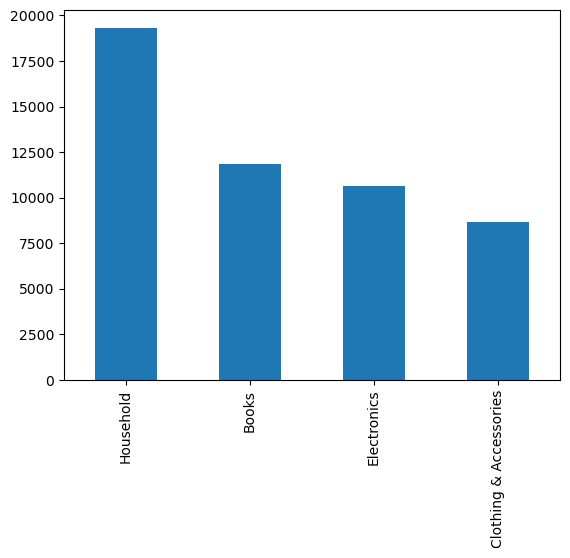

In [11]:
df['category'].value_counts().plot(kind='bar')

### Drop NA values

In [12]:
df.isnull().sum()

category       0
description    1
dtype: int64

In [13]:
df.dropna(inplace = True)
df.shape

(50424, 2)

In [14]:
df.isnull().sum()

category       0
description    0
dtype: int64

In [16]:
df.category.replace("Clothing & Accessories", "Clothing_Accessories", inplace=True)
df.category.unique()

array(['Household', 'Books', 'Clothing_Accessories', 'Electronics'],
      dtype=object)

When you train a fasttext model, it expects labels to be specified with label prefix. We will just create a third column in the dataframe that has label as well as the product description

In [19]:
df['category'] = '__label__' + df['category'].astype(str)
df.head()

,category,description
0,__label__Household,Paper Plane Design Framed Wall Hanging Motivat...
1,__label__Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,__label__Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,__label__Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,__label__Household,Incredible Gifts India Wooden Happy Birthday U...


In [20]:
df['category_description'] = df['category'] + ' ' + df['description']
df.head()

,category,description,category_description
0,__label__Household,Paper Plane Design Framed Wall Hanging Motivat...,__label__Household Paper Plane Design Framed W...
1,__label__Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",__label__Household SAF 'Floral' Framed Paintin...
2,__label__Household,SAF 'UV Textured Modern Art Print Framed' Pain...,__label__Household SAF 'UV Textured Modern Art...
3,__label__Household,"SAF Flower Print Framed Painting (Synthetic, 1...",__label__Household SAF Flower Print Framed Pai...
4,__label__Household,Incredible Gifts India Wooden Happy Birthday U...,__label__Household Incredible Gifts India Wood...


### Preprocessing

In [21]:
import re

In [22]:
def preprocess_text(text):
    text = re.sub(f'[^\w\s]',' ',text)
    text = re.sub(f' +',' ',text)
    return text.strip().lower()

In [23]:
preprocess_text("Hi !!!, I am coming from the @ shop?")

'hi i am coming from the shop'

In [24]:
df['category_description'] = df['category_description'].map(preprocess_text)

In [25]:
df.head()

,category,description,category_description
0,__label__Household,Paper Plane Design Framed Wall Hanging Motivat...,__label__household paper plane design framed w...
1,__label__Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",__label__household saf floral framed painting ...
2,__label__Household,SAF 'UV Textured Modern Art Print Framed' Pain...,__label__household saf uv textured modern art ...
3,__label__Household,"SAF Flower Print Framed Painting (Synthetic, 1...",__label__household saf flower print framed pai...
4,__label__Household,Incredible Gifts India Wooden Happy Birthday U...,__label__household incredible gifts india wood...


### Train test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)
train.shape, test.shape

((40339, 3), (10085, 3))

In [29]:
train.to_csv("./data/ecommerce.train", columns=["category_description"], index=False, header=False)
test.to_csv("./data/ecommerce.test", columns=["category_description"], index=False, header=False)

### TRain fastText model

In [31]:
import fasttext

In [32]:
model = fasttext.train_supervised(input = './data/ecommerce.train')

### Test Model

In [33]:
model.test('./data/ecommerce.test')

(10085, 0.9677739216658403, 0.9677739216658403)

First parameter (10084) is test size. Second and third parameters are precision and recall respectively. You can see we are getting around 96% precision which is pretty good

In [34]:
model.predict("wintech assemble desktop pc cpu 500 gb sata hdd 4 gb ram intel c2d processor 3")


(('__label__electronics',), array([0.99961442]))

In [35]:
model.predict("ockey men's cotton t shirt fabric details 80 cotton 20 polyester super combed cotton rich fabric")


(('__label__clothing_accessories',), array([1.0000093]))

In [36]:
model.predict("think and grow rich deluxe edition")


(('__label__books',), array([1.00000918]))

In [37]:
model.get_nearest_neighbors("painting")

[(0.9983344674110413, 'penta'),
 (0.998332142829895, 'refreshes'),
 (0.998332142829895, 'lounges'),
 (0.9983218908309937, 'emeril'),
 (0.9983218908309937, 'lagasse'),
 (0.9983195662498474, '10728'),
 (0.9983190894126892, 'cer028'),
 (0.998316764831543, 'phdstore'),
 (0.9983075261116028, 'shelfpocket'),
 (0.998304009437561, 'rake')]